In [1]:
import pandas as pd
df_btc = pd.read_csv("OHLCV_Binance_BTC-USDT_D20170817T040000UTC-D20240404T115959UTC_1min.csv")

In [6]:
df_btc.head()

,timestamp,open,high,low,close,volume
0,1502942400,4261.48,4261.48,4261.48,4261.48,1.775183
1,1502942460,4261.48,4261.48,4261.48,4261.48,0.000000
2,1502942520,4280.56,4280.56,4280.56,4280.56,0.261074
3,1502942580,4261.48,4261.48,4261.48,4261.48,0.012008
4,1502942640,4261.48,4261.48,4261.48,4261.48,0.140796


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_crypto_data(df):
    # Ensure timestamp is datetime
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df.set_index('timestamp', inplace=True, drop=False)

    # --- 1. Basic Info ---
    print("📌 Dataset Info")
    print(df.info())
    print("\n📌 Statistical Summary")
    print(df.describe())
    
    # --- 2. Missing values ---
    print("\n📌 Missing Value Counts")
    print(df.isna().sum())
    
    # --- 3. Distributional Plots ---
    numeric_cols = ['open', 'high', 'low', 'close', 'volume']
    
    # Histograms
    df[numeric_cols].hist(figsize=(12, 8), bins=50)
    plt.suptitle("Histograms of Key Variables")
    plt.show()

    # Boxplots
    for col in numeric_cols:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=df[col])
        plt.title(f"Boxplot of {col}")
        plt.show()
    
    # --- 4. Bivariate Visuals ---
    # Close vs Volume scatter
    plt.figure(figsize=(8, 5))
    plt.scatter(df['close'], df['volume'], alpha=0.5)
    plt.title("Scatter: Close vs Volume")
    plt.xlabel("Close Price")
    plt.ylabel("Volume")
    plt.show()
    
    # Time series plots
    df[['close', 'volume']].plot(subplots=True, figsize=(12, 6), title=["Close Price", "Volume"])
    plt.show()
    
    # --- 5. Correlation Heatmap ---
    plt.figure(figsize=(8, 6))
    corr = df[numeric_cols].corr()
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show()


📌 Dataset Info
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3479528 entries, 1970-01-01 00:00:01.502942400 to 1970-01-01 00:00:01.712231940
Data columns (total 6 columns):
 #   Column     Dtype         
---  ------     -----         
 0   timestamp  datetime64[ns]
 1   open       float64       
 2   high       float64       
 3   low        float64       
 4   close      float64       
 5   volume     float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 185.8 MB
None

📌 Statistical Summary
                           timestamp          open          high  \
count                        3479528  3.479528e+06  3.479528e+06   
mean   1970-01-01 00:00:01.607720084  2.219926e+04  2.221205e+04   
min    1970-01-01 00:00:01.502942400  2.830000e+03  2.830000e+03   
25%    1970-01-01 00:00:01.555428165  8.090000e+03  8.094970e+03   
50%    1970-01-01 00:00:01.607763030  1.681235e+04  1.681819e+04   
75%    1970-01-01 00:00:01.660034235  3.427414e+04  3.429943e+04   
max    

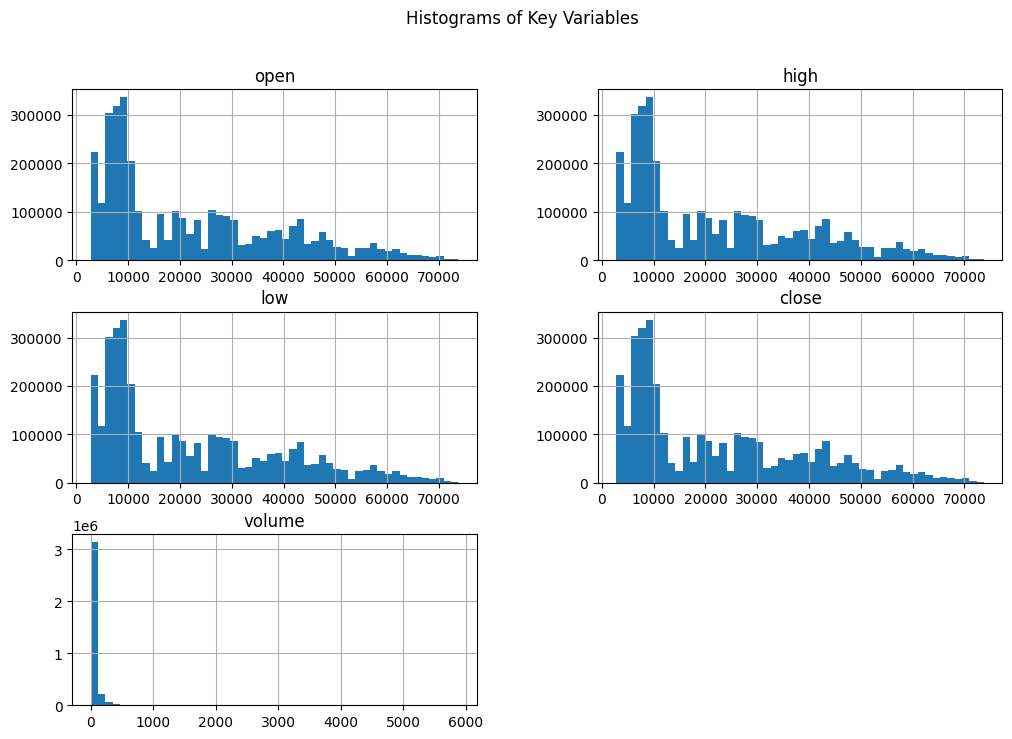

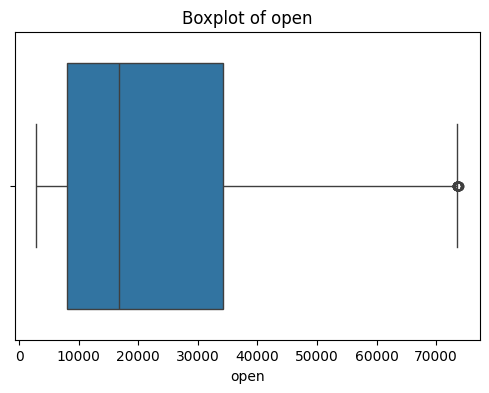

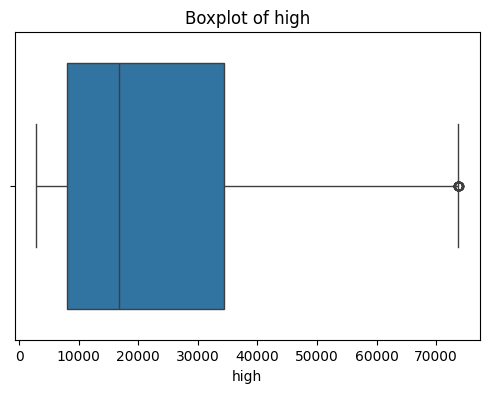

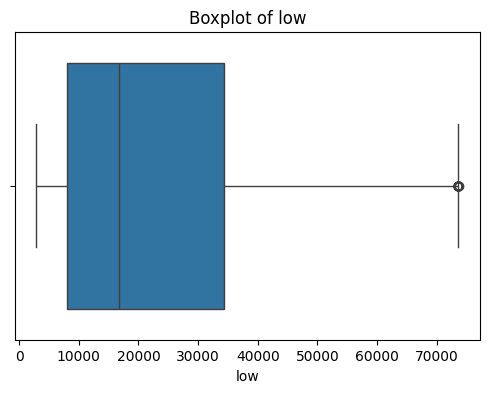

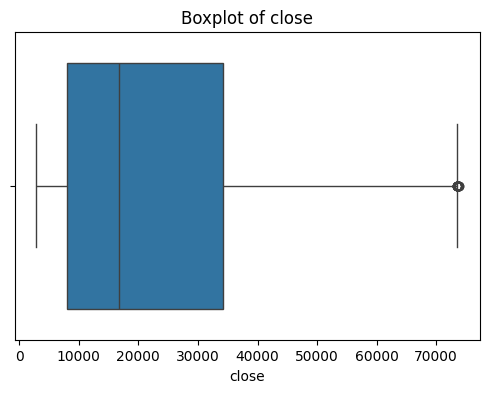

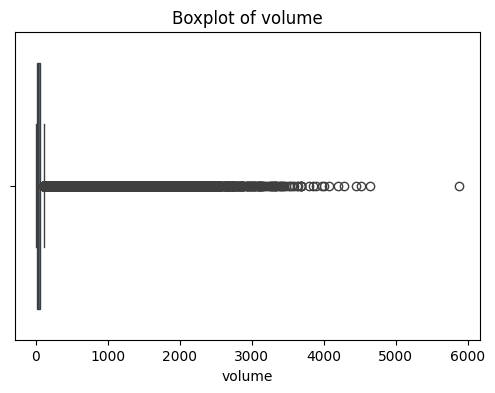

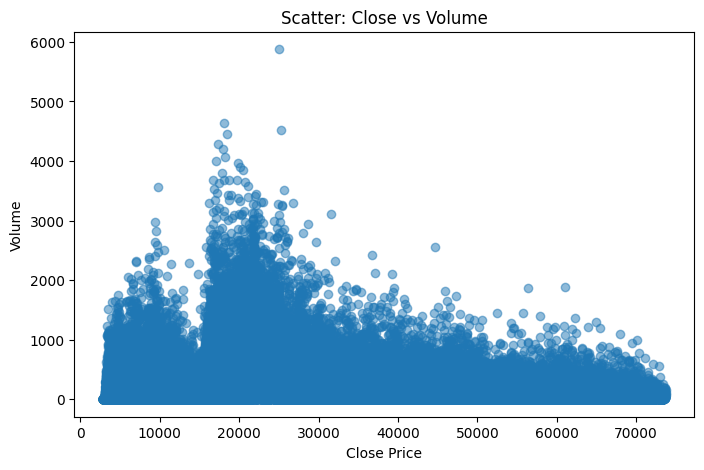

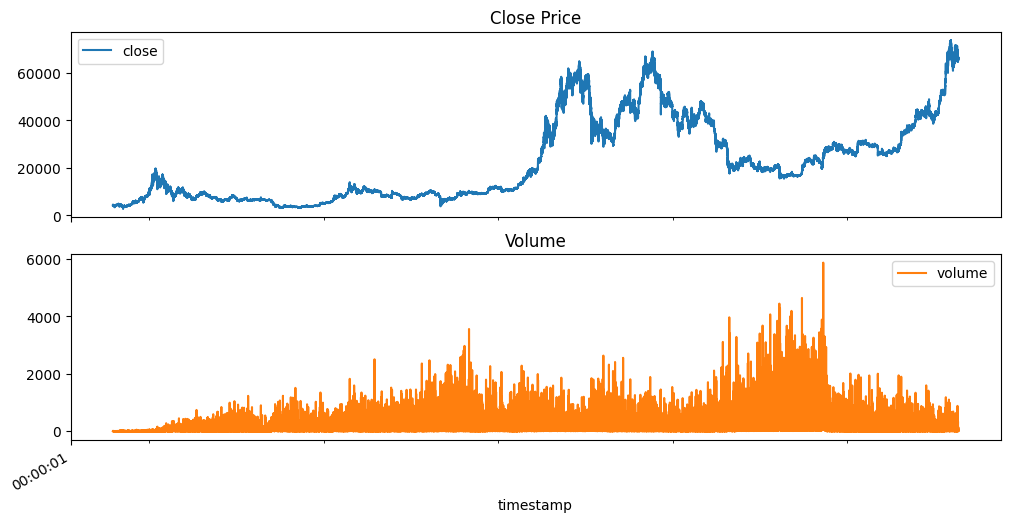

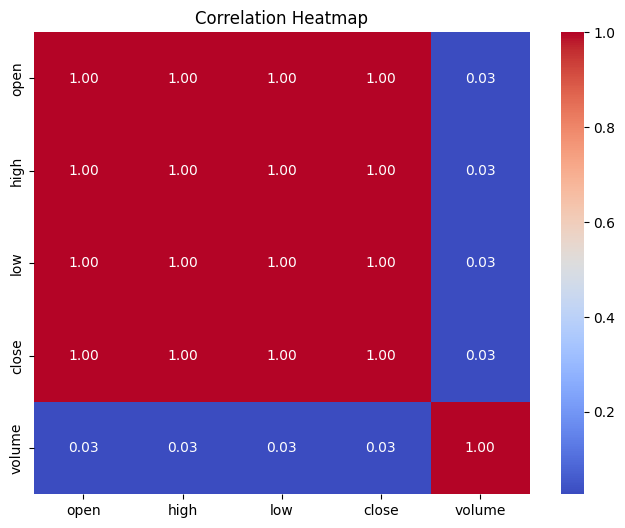

In [10]:
analyze_crypto_data(df_btc)